# SAFE algorithm and SAFE score

We'll begin our exploration of the *spatial analysis of functional enrichment* (**SAFE**) algorithm using graph_simpleBC...

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from tmap.tda import mapper, Filter
from tmap.tda.cover import Cover
from tmap.tda.plot import Color
from tmap.tda.metric import Metric
from tmap.tda.utils import optimize_dbscan_eps
from tmap.netx.SAFE import SAFE_batch, get_SAFE_summary
from tmap.test import load_data
from scipy.spatial.distance import squareform,pdist
import pandas as pd
import os

# load taxa abundance data, sample metadata and precomputed distance matrix
data = pd.read_csv('table-with-taxonomy.tsv', sep='\t', header=0, index_col='#OTU ID')
data = data.T
metadata = pd.read_csv('16S_metadata_binary.tsv', sep='\t', header=0, index_col='Sample ID')
dm = squareform(pdist(data,metric='braycurtis'))

# TDA Step1. initiate a Mapper
tm = mapper.Mapper(verbose=1)

# TDA Step2. Projection
metric = Metric(metric="precomputed")
lens = [Filter.MDS(components=[0, 1], metric=metric, random_state=100)]
projected_X = tm.filter(dm, lens=lens)

# Step4. Covering, clustering & mapping
eps = optimize_dbscan_eps(data, threshold=95)
clusterer = DBSCAN(eps=eps, min_samples=1) 
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)  
graph = tm.map(data=data, cover=cover, clusterer=clusterer)
print(graph.info())

n_iter = 1000
enriched_scores = SAFE_batch(graph,
                     metadata=pd.concat([data,metadata],axis=1),
                     n_iter=n_iter,
                     _mode = 'enrich')
safe_summary = get_SAFE_summary(graph=graph,
                            metadata=pd.concat([data,metadata],axis=1),
                            safe_scores=enriched_scores,
                            n_iter=n_iter,
                            p_value=0.05)

Filtering by MDS.
...calculate Filter(which used to create cover) using the provided precomputed lens.


100%|██████████| 400/400 [00:00<00:00, 4500.34it/s]

Filtering has been completed.
Mapping on data (116, 268) using lens (116, 2)
...minimal number of points in hypercube to do clustering: 1
...create 335 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.


...create 1619 edges.
Finish TDA mapping


  0%|          | 0/1000 [00:00<?, ?it/s]


Graph
Contains 335 nodes and 116 samples
During constructing graph, 0 (100.0%) samples lost

Used params:

cluster params
algorithm: auto
eps: 76041.84946073355
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 1
n_jobs: None
p: None
cover params
r: 20
overlap: 0.75
lens params
lens_0:
components: [0, 1]
metric: precomputed




100%|█████████▉| 999/1000 [00:13<00:00, 23.45it/s]

100%|█████████▉| 999/1000 [00:15<00:00, 63.48it/s]


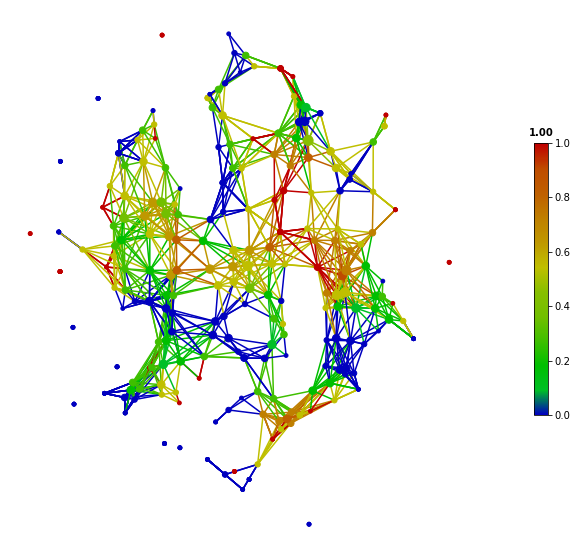

In [17]:
# Targeting the groups (CRC vs Control) in the visualisation
# 1 being CRC and 0 being Control

color = Color(metadata.loc[:,'Group'],target_by='sample',dtype='numerical')
graph.show(color=color)

In [18]:
enriched_scores

,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;__;__,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;__,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Sphingomonadales;f__Sphingomonadaceae;g__Sphingomonas,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Paracoccus,k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;__,...,k__Bacteria;p__Chlamydiae;c__Chlamydiia;o__;f__;g__,k__Bacteria;p__Verrucomicrobia;c__Verruco-5;o__WCHB1-41;f__RFP12;g__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Nocardioidaceae;g__Nocardioides,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Cardiobacteriales;f__Cardiobacteriaceae;__,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptococcaceae;g__Desulfotomaculum,k__Bacteria;p__Deferribacteres;c__Deferribacteres;o__Deferribacterales;f__Deferribacteraceae;g__Mucispirillum,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alteromonadales;f__Shewanellaceae;g__Shewanella,k__Bacteria;p__Tenericutes;c__Mollicutes;o__Anaeroplasmatales;f__Anaeroplasmataceae;g__Anaeroplasma,Group,Gender
0,-0.0,0.63003,-0.0,0.568386,-0.0,-0.000000,-0.000000,-0.000000,0.476475,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.684814
1,-0.0,0.63003,-0.0,0.568386,-0.0,-0.000000,-0.000000,-0.000000,0.476475,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.684814
2,-0.0,-0.00000,-0.0,-0.000000,-0.0,-0.000000,0.280937,0.251200,-0.000000,0.598971,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.715581,-0.000000
3,-0.0,0.63003,-0.0,0.568386,-0.0,-0.000000,-0.000000,-0.000000,0.476475,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.684814
4,-0.0,-0.00000,-0.0,0.568386,-0.0,0.113898,0.540283,0.459427,-0.000000,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,-0.0,-0.00000,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.684814
331,-0.0,-0.00000,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.684814
332,-0.0,-0.00000,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.273875
333,-0.0,-0.00000,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.273875


In [19]:
safe_summary

,SAFE total score,number of enriched nodes,number of enriched samples,SAFE enriched score,enriched abundance ratio,enriched SAFE score ratio
name,,,,,,
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__,5.944920,0,0,0.000000,0.000000,0.000000
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus,17.570323,26,10,16.380773,0.463929,0.932298
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides,32.435742,42,12,26.667918,0.372546,0.822177
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia,23.407150,17,8,9.662559,0.277813,0.412804
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;__;__,16.983931,17,8,9.665018,0.294533,0.569068
...,...,...,...,...,...,...
k__Bacteria;p__Deferribacteres;c__Deferribacteres;o__Deferribacterales;f__Deferribacteraceae;g__Mucispirillum,2.506718,0,0,0.000000,0.000000,0.000000
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alteromonadales;f__Shewanellaceae;g__Shewanella,2.506718,0,0,0.000000,0.000000,0.000000
k__Bacteria;p__Tenericutes;c__Mollicutes;o__Anaeroplasmatales;f__Anaeroplasmataceae;g__Anaeroplasma,7.925776,12,13,6.215646,1.000000,0.784232


We'll use the SAFE scores that we've just generated to investigate the presence of *Peptostreptocossus* in the network. 
This genus was highlighted to be enriched in CRC patients during the QIIME 2 analysis of this data set. 

The first step will be to color the network to show the abundance of *Peptostreptocossus* features from the OTU table.

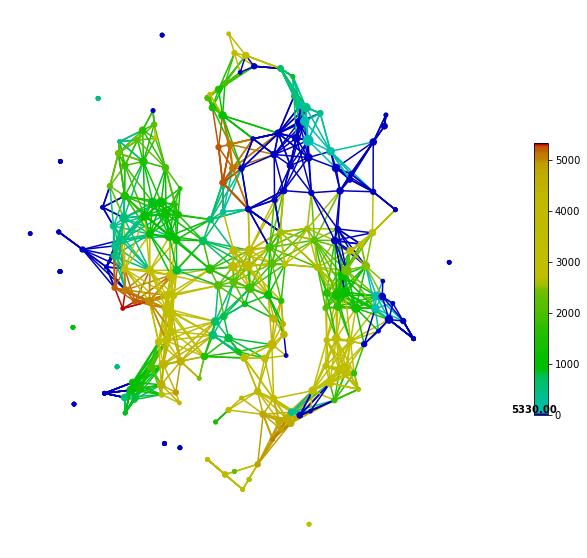

In [20]:
# k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae;g__Peptostreptococcus

color = Color(data.loc[:,'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae;g__Peptostreptococcus'],target_by='sample',dtype='numerical')
graph.show(color=color)

The graph above shows two main spots of enrichment. 

Next we will use the SAFE scores to colour the network for *Peptostreptocossus*.

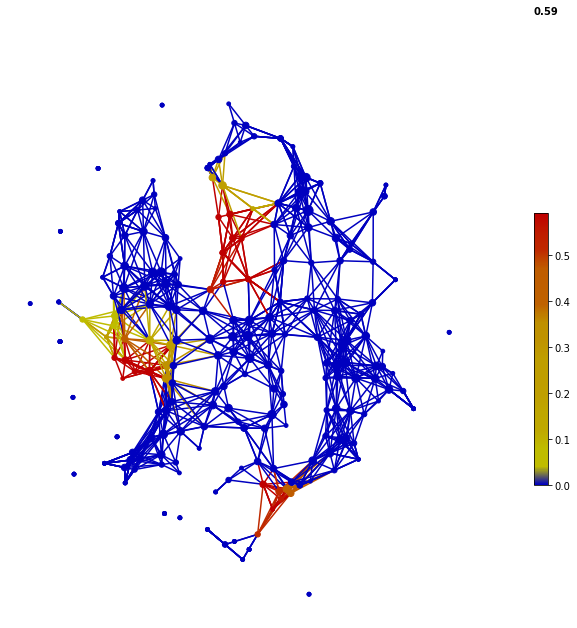

In [21]:
color = Color(enriched_scores.loc[:,'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae;g__Peptostreptococcus'],target_by='node',dtype='numerical')
graph.show(color=color)

By viewing the two methods of network coloring side by side it is clear to see that SAFE scores allow a clearer visualisation of enrichment patterns for this genus.   

Lets repeat this to investigate the presence of *Fusobacterium* species.

This species was not found to be enriched as part of QIIME 2 analysis, although *F. nucleatum* inparticular has long been associated with CRC patients.

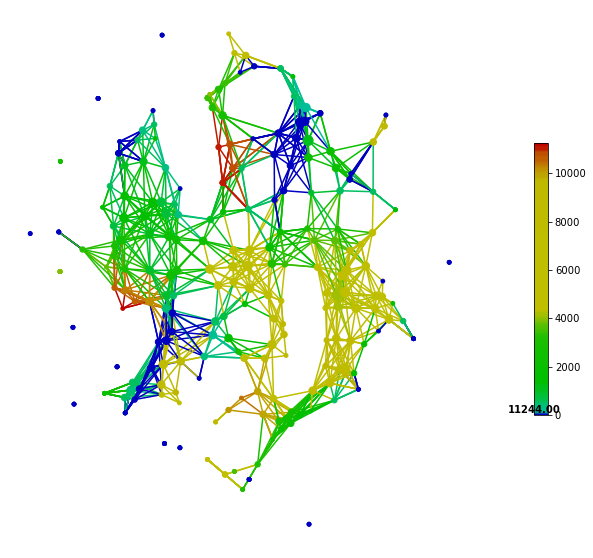

In [22]:
# k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium
color = Color(data.loc[:,'k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium'],target_by='sample',dtype='numerical')
graph.show(color=color)

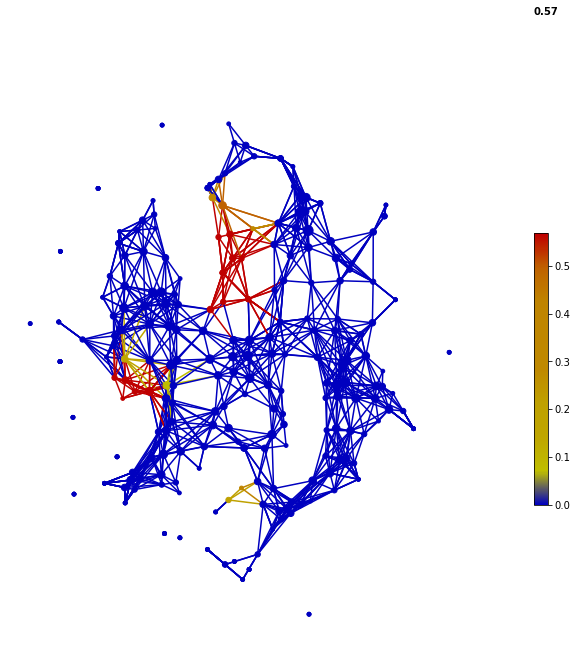

In [23]:
color = Color(enriched_scores.loc[:,'k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium'],target_by='node',dtype='numerical')
graph.show(color=color)

In [24]:
#color = Color(enriched_scores,target_by='node',dtype='numerical')
#graph.show(color=color)

We'll continue our analysis to investigate the presence of the other taxonomic markers outlined by Zeller *et al.* 2014. 

They had four major taxomonic markers:
 - *Fusobacterium nucleatum* (sub species *vincentii* and *animalis*), 
 - *Peptostreptococcus stomatis* 
 - *Porphyromonas asaccharolytica*
 
The only one left to investigate is *Porphyromonas asaccharolytica*

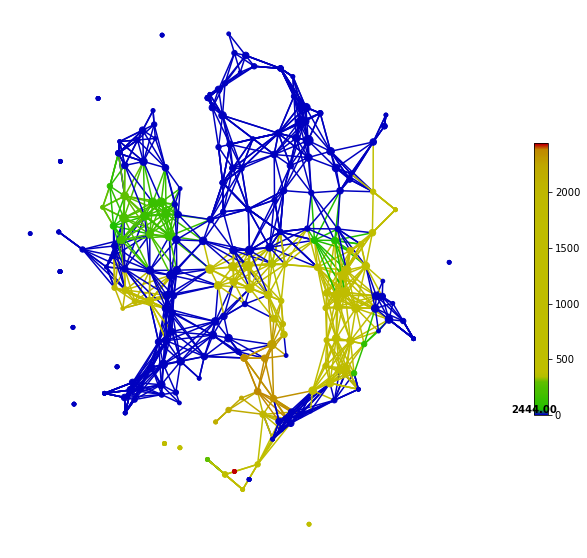

In [25]:
# k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Porphyromonas
color = Color(data.loc[:,'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Porphyromonas'],target_by='sample',dtype='numerical')
graph.show(color=color)

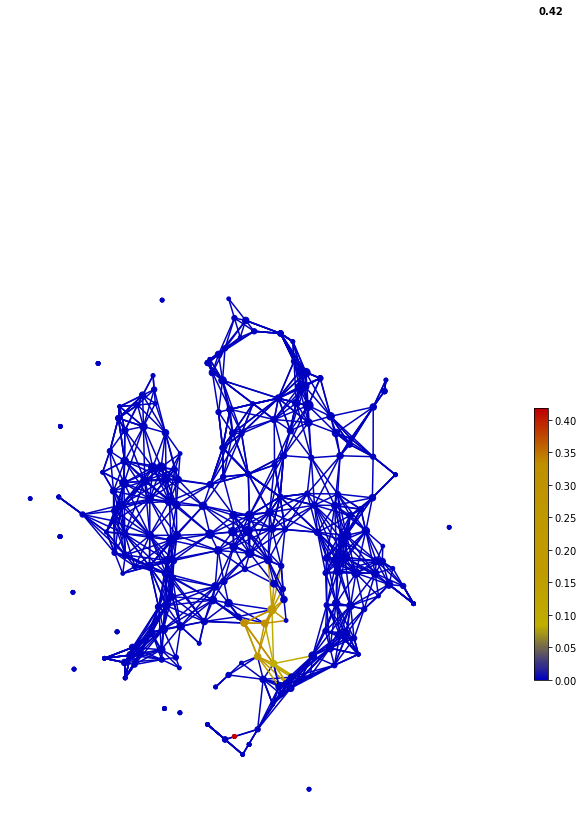

In [26]:
color = Color(enriched_scores.loc[:,'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Porphyromonas'],target_by='node',dtype='numerical')
graph.show(color=color)